# Linear Regression

Tudor Berariu, Andrei Nica, 2018

In [21]:
import math
import torch
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## The dataset

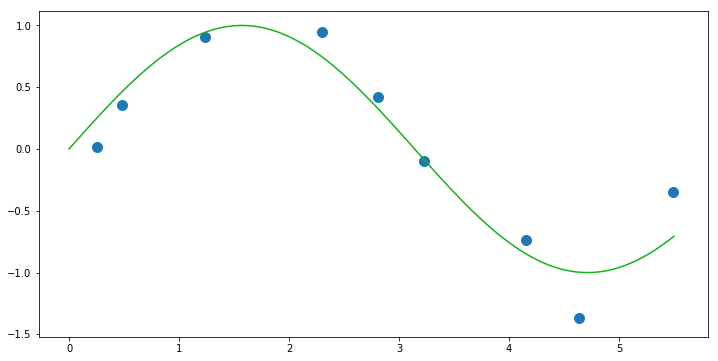

In [40]:
def generate_examples(N:int = 9, noise:float = 0.2, dist_noise:float = 0.2):
    X = np.linspace(0, 1.75 * math.pi, N)
    X += np.random.randn(N) * dist_noise
    T = np.sin(X) + np.random.randn(N) * noise
    return X, T

N_train = 9
N_test = 50
noise = 0.2

X_train, T_train = generate_examples(N=N_train, noise=noise)
X_test, T_test = generate_examples(N=N_test, noise=noise)
X_real, T_real = generate_examples(100, .0, .0)

plt.figure(figsize=(12,6))
plt.plot(X_real, T_real, sns.xkcd_rgb["green"])
plt.scatter(X_train, T_train, s=100)
# plt.scatter(X_test, T_test, s=10)
plt.show()

## Extracting features
$$\phi_i(x) = x^i, \quad 0 \le i \le M$$

In [42]:
def extract_features(X: np.array, M: int):
    N = X.size
    phi = np.ones((N, M + 1))
    for j in range(1, M+1):
        phi[:,j] = phi[:,j-1] * X
    return phi

extract_features(X_train, 4)

array([[1.00000000e+00, 2.54227205e-01, 6.46314720e-02, 1.64310785e-02,
        4.17722717e-03],
       [1.00000000e+00, 4.82071667e-01, 2.32393092e-01, 1.12030125e-01,
        5.40065492e-02],
       [1.00000000e+00, 1.23980373e+00, 1.53711330e+00, 1.90571881e+00,
        2.36271729e+00],
       [1.00000000e+00, 2.29895478e+00, 5.28519310e+00, 1.21504200e+01,
        2.79332661e+01],
       [1.00000000e+00, 2.80638529e+00, 7.87579842e+00, 2.21025249e+01,
        6.20282008e+01],
       [1.00000000e+00, 3.22600610e+00, 1.04071154e+01, 3.35734176e+01,
        1.08308050e+02],
       [1.00000000e+00, 4.15312822e+00, 1.72484740e+01, 7.16351240e+01,
        2.97509855e+02],
       [1.00000000e+00, 4.63943067e+00, 2.15243170e+01, 9.98605763e+01,
        4.63296220e+02],
       [1.00000000e+00, 5.48808402e+00, 3.01190662e+01, 1.65295966e+02,
        9.07158148e+02]])

## Closed-form solution

We search for $${\bf w}^* = \underset{{\bf w}}{\arg\!\min} \sum_{n} \left({\bf w}^{\text{T}}{\bf \phi}^{(n)} - t^{(n)}\right)^2$$

In [63]:
def mean_squared_error(Y, T):
    return np.mean((Y - T) * (Y- T))

In [64]:
def train_params(X, T, M):
    Phi = extract_features(X, M)
    W = np.dot(np.linalg.pinv(Phi),T)
    return W

In [65]:
def predict(X, W, M):
    Phi = extract_features(X, M)
    Y = np.dot(Phi, W)
    return Y

## Visualise learned predictor

Train error: 0.00015826956776398204
Test  error: 1.1329442474873033


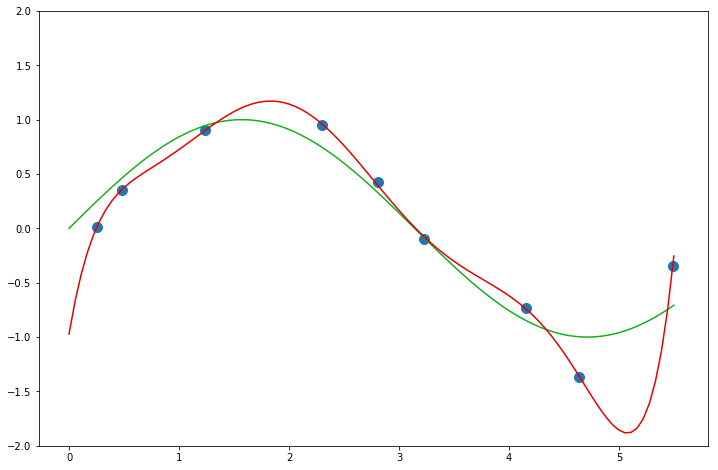

In [73]:
M = 7

# Train
W = train_params(X_train, T_train, M)

# Compute mean squared error
Y_train = predict(X_train, W, M)
Y_test = predict(X_test, W, M)
print("Train error:", mean_squared_error(Y_train, T_train))
print("Test  error:", mean_squared_error(Y_test, T_test))

# Plot
Y_real = predict(X_real, W, M)

plt.figure(figsize=(12,8))
plt.plot(X_real, T_real, sns.xkcd_rgb["green"])
plt.plot(X_real, Y_real, sns.xkcd_rgb["red"])
plt.scatter(X_train, T_train, s=100)
plt.ylim(-2, 2)
plt.show()

## Evaluate predictor

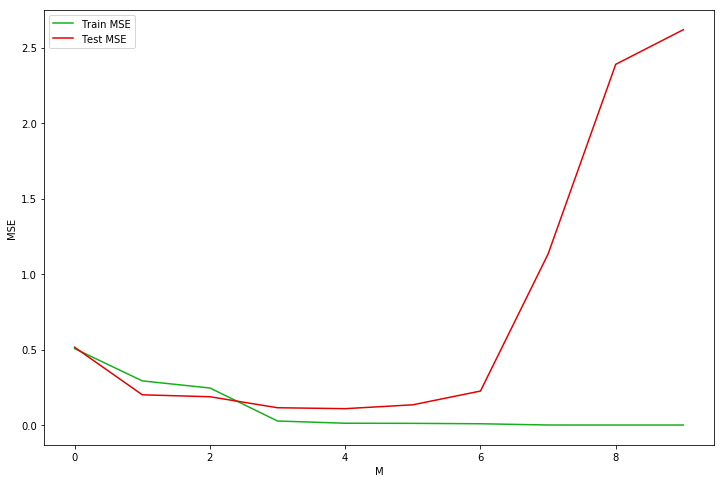

In [75]:
train_mse = []
test_mse = []
for M in range(10):
    W = train_params(X_train, T_train, M)
    Y_train = predict(X_train, W, M)
    Y_test = predict(X_test, W, M)
    train_mse.append(mean_squared_error(Y_train, T_train))
    test_mse.append(mean_squared_error(Y_test, T_test))

plt.figure(figsize=(12,8))
plt.plot(range(10), train_mse, sns.xkcd_rgb["green"], label="Train MSE")
plt.plot(range(10), test_mse, sns.xkcd_rgb["red"], label="Test MSE")
plt.xlabel("M")
plt.ylabel("MSE")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.show()